<a href="https://colab.research.google.com/github/mrrajatgarg/kaggle/blob/master/Digit_Recognizer_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading of dataset from Kaggle

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrrajatgarg","key":"3750226d6a987e77dc47f7c58171b335"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 67 Mar 19 10:48 kaggle.json


In [3]:
!kaggle competitions download -c digit-recognizer

 90% 66.0M/73.2M [00:00<00:00, 38.9MB/s]
100% 73.2M/73.2M [00:01<00:00, 75.5MB/s]
 96% 47.0M/48.8M [00:00<00:00, 75.8MB/s]
100% 48.8M/48.8M [00:00<00:00, 83.1MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 174MB/s]


In [4]:
!ls

kaggle.json  sample_data  sample_submission.csv  test.csv  train.csv


# Importing Libraries

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential

# Converting of dataframe to numpy array

In [0]:
train_dataframe = pd.read_csv('train.csv')

In [9]:
train_dataframe.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
train_labels = train_dataframe['label']

In [0]:
train_pixels_dataframe = train_dataframe.drop(columns = ['label'])

In [14]:
train_pixels_dataframe.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = train_pixels_dataframe.values
y = train_labels.values

print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (42000, 784)
Shape of y:  (42000,)


In [68]:
test_dataframe = pd.read_csv('test.csv')

print(test_dataframe.head())

X_test = test_dataframe.values

print("X_test shape: ", X_test.shape)

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

# Visualization of dataset

**Change index to see different images from the dataset and their respective labels**

In [0]:
index = 2

label is:  1


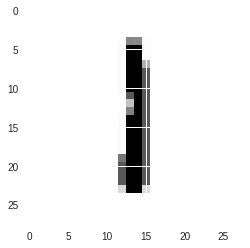

In [32]:
plt.imshow(X[index].reshape(28, 28))
print("label is: ", y[index])

# Splitting of dataset to train and validation split

**Shuffling of dataset**

In [0]:
X_random, y_random = shuffle(X, y)

**Splitting 80% to train set and 20% to validation set**

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_random, y_random, test_size = 0.2)

In [0]:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

In [42]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ", y_train_one_hot.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ",y_val_one_hot.shape)

X_train shape:  (33600, 784)
y_train shape:  (33600, 10)
X_val shape:  (8400, 784)
y_val shape:  (8400, 10)


In [0]:
X_train = X_train/255
X_val = X_val/255

In [0]:
X_test = X_test/255

# Creation of Neural Network

In [0]:
model = Sequential([
    keras.layers.Dense(400, input_shape = (784,)),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10),
    keras.layers.Activation('softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
activation_10 (Activation)   (None, 400)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data = (X_val, y_val_one_hot))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 172us/step - loss: 0.2830 - acc: 0.9164 - val_loss: 0.1594 - val_acc: 0.9519
Epoch 2/10
33600/33600 [==============================] - 5s 159us/step - loss: 0.1257 - acc: 0.9624 - val_loss: 0.1183 - val_acc: 0.9612
Epoch 3/10
33600/33600 [==============================] - 5s 158us/step - loss: 0.0874 - acc: 0.9725 - val_loss: 0.0977 - val_acc: 0.9698
Epoch 4/10
33600/33600 [==============================] - 5s 158us/step - loss: 0.0666 - acc: 0.9798 - val_loss: 0.0924 - val_acc: 0.9724
Epoch 5/10
33600/33600 [==============================] - 5s 158us/step - loss: 0.0518 - acc: 0.9838 - val_loss: 0.0905 - val_acc: 0.9733
Epoch 6/10
33600/33600 [==============================] - 5s 158us/step - loss: 0.0424 - acc: 0.9866 - val_loss: 0.0881 - val_acc: 0.9737
Epoch 7/10
33600/33600 [==============================] - 5s 158us/step - loss: 0.0365 - acc: 0.9879 - val_loss: 0.0845 - v

# Predictions on Test data

In [80]:
prediction = model.predict(X_test)

print(prediction.shape)

print(prediction[0:2])

(28000, 10)
[[1.6351982e-15 6.6562691e-19 1.0000000e+00 1.1575759e-11 6.5899841e-16
  8.8671790e-17 2.1524668e-12 1.1792667e-10 9.7231023e-13 1.0013442e-14]
 [9.9999774e-01 2.0905755e-12 6.4627277e-09 1.2920125e-10 3.3888695e-12
  1.6194423e-06 2.6652373e-07 3.4689518e-07 2.3961218e-11 2.8991084e-11]]


In [82]:
results = np.argmax(prediction, axis=1)

print(results.shape)

print(results[0:2])

(28000,)
[2 0]


# Visualizing some results

Our model prediction:  9


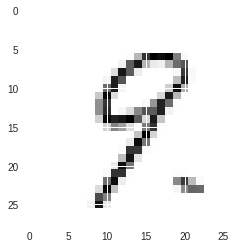

In [85]:
index = 2

plt.imshow(X_test[index].reshape(28, 28))

print("Our model prediction: ",results[index])

Our model prediction:  5


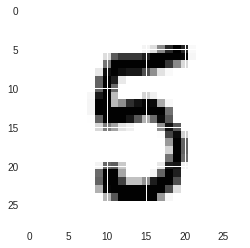

In [86]:
index = 10

plt.imshow(X_test[index].reshape(28, 28))

print("Our model prediction: ",results[index])

# Converting the result in csv file in format accepted by Kaggle

In [0]:
imageIdArray = np.zeros((28000,), dtype = 'int32')

for i in range(0, 28000) :
  #print(i)
  imageIdArray[i] = i+1

In [105]:
print(imageIdArray[100:110])

[101 102 103 104 105 106 107 108 109 110]


In [106]:
submission = pd.DataFrame({'ImageId': imageIdArray, 'Label': results})

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [107]:
filename = 'digit_recognizer_kaggle.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: digit_recognizer_kaggle.csv
